In [1]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=74b3ed0431231d3df0ef0db64d4e14a2853ab33acd8619723e1f630743bec7a9
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [2]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()

Saving 500s45f6t1g0.01py1-y2-y3.csv to 500s45f6t1g0.01py1-y2-y3.csv


In [3]:
df = pd.read_csv("500s45f6t1g0.01py1-y2-y3.csv")
df.head()
y_col = [
    'Y1',
    'Y2',
    'Y3',
    'Y4',
    'Y5',
    'Y6'
 ]
y = df[y_col]
y.head()
X = df[df.columns.drop(y)]
X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45
0,0.248758,0.605489,0.334011,0.130264,0.468297,0.087476,0.916506,0.838327,0.380739,0.203269,...,0.751222,0.300823,0.131069,0.742569,0.383755,0.647717,0.279509,0.841151,0.229462,0.414415
1,0.449701,0.728961,0.814986,0.408839,0.572708,0.517744,0.873933,0.843511,0.903144,0.213934,...,0.152748,0.398997,0.879672,0.918533,0.361772,0.155447,0.101283,0.605683,0.294348,0.298730
2,0.362929,0.583064,0.286722,0.678153,0.512808,0.386092,0.189634,0.684118,0.259163,0.470658,...,0.290641,0.379502,0.665368,0.704212,0.913133,0.261240,0.831126,0.881673,0.899631,0.947757
3,0.056733,0.473611,0.758143,0.687690,0.132854,0.337999,0.384864,0.888593,0.548069,0.567900,...,0.698144,0.189214,0.377898,0.554380,0.306914,0.252781,0.634232,0.974818,0.550960,0.385541
4,0.422920,0.995030,0.351496,0.745691,0.537371,0.134851,0.686684,0.175852,0.979618,0.760291,...,0.082237,0.256780,0.878634,0.097106,0.821164,0.673177,0.102672,0.236439,0.496957,0.785500


In [4]:
y.head()

,Y1,Y2,Y3,Y4,Y5,Y6
0,0.417566,0.456932,0.639308,0.453572,0.252569,0.335382
1,0.434459,0.135521,0.157193,0.510111,0.481291,0.526910
2,0.435298,0.598916,0.628519,0.433745,0.541352,0.749574
3,0.507423,0.593750,0.539288,0.402642,0.052424,0.610284
4,0.673961,0.845515,0.216361,0.322293,0.422938,0.642603


In [6]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split( 
                        X, y, test_size = 0.20, random_state = 39)
from sklearn.multioutput import MultiOutputRegressor
rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
rfg.score(X_test, y_test)

0.8183461487955084

In [7]:
import math
from sklearn.metrics import  mean_squared_error as morrfr_rmse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse1=math.sqrt(morrfr_rmse(y_test, y_pred))
print('RMSE for morrfr is',morrfr_rmse1)

morrfr_mae1=morrfr_mae(y_test, y_pred)
print('MAE for morrfr is',morrfr_mae1)

RMSE for morrfr is 0.07213692248188962
MAE for morrfr is 0.0550153551662918


In [8]:
#Running TPOT-MOR using MultiOutputRegressor from SK-Learn
import numpy as np
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
tpotreg = MultiOutputRegressor(TPOTRegressor(warm_start=True ,generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10))
tpotreg.fit(X_train,y_train)
tpotreg.score(X_test, y_test)


import math
from sklearn.metrics import  mean_squared_error as tpotmo_mse
from sklearn.metrics import mean_absolute_error as tpotmo_mae
tpotmo_rmse1=math.sqrt(tpotmo_mse(y_test, y_pred))
print('RMSE for TPOT-MO is',tpotmo_rmse1)

tpotmo_mae1=tpotmo_mae(y_test, y_pred)
print('MAE for TPOT-MO is',tpotmo_mae1)
tpotreg.score(X_test, y_test)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0006731781795783944

Generation 2 - Current best internal CV score: -0.0006731781795783944

Generation 3 - Current best internal CV score: -0.0006708789496168534

Generation 4 - Current best internal CV score: -0.0006708789496168534

Generation 5 - Current best internal CV score: -0.0006708789496168534

Best pipeline: LinearSVR(SelectPercentile(input_matrix, percentile=76), C=0.5, dual=True, epsilon=0.01, loss=epsilon_insensitive, tol=1e-05)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0005977558058159808

Generation 2 - Current best internal CV score: -0.0005977515026471853

Generation 3 - Current best internal CV score: -0.0005976543205118069

Generation 4 - Current best internal CV score: -0.0005976543205118069

Generation 5 - Current best internal CV score: -0.0005976543205118069

Best pipeline: ElasticNetCV(RobustScaler(input_matrix), l1_ratio=0.5, tol=0.001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0004930921979863347

Generation 2 - Current best internal CV score: -0.0004930921979863347

Generation 3 - Current best internal CV score: -0.0004930921979863347

Generation 4 - Current best internal CV score: -0.0004930921979863347

Generation 5 - Current best internal CV score: -0.0004893061465441517

Best pipeline: ElasticNetCV(SelectFwe(input_matrix, alpha=0.04), l1_ratio=0.5, tol=0.01)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.5429943975042617e-05

Generation 2 - Current best internal CV score: -2.541292129391463e-05

Generation 3 - Current best internal CV score: -2.5412921293914584e-05

Generation 4 - Current best internal CV score: -2.536751359693593e-05

Generation 5 - Current best internal CV score: -2.536751359693593e-05

Best pipeline: LassoLarsCV(SGDRegressor(LassoLarsCV(input_matrix, normalize=True), alpha=0.001, eta0=1.0, fit_intercept=False, l1_ratio=0.5, learning_rate=invscaling, loss=huber, penalty=elasticnet, power_t=1.0), normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00017241515321442702

Generation 2 - Current best internal CV score: -0.00017208527261803483

Generation 3 - Current best internal CV score: -0.00017181170759170586

Generation 4 - Current best internal CV score: -0.00017181170759170586

Generation 5 - Current best internal CV score: -0.00015407832780373938

Best pipeline: LinearSVR(input_matrix, C=1.0, dual=True, epsilon=0.0001, loss=epsilon_insensitive, tol=0.0001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00014399708463853689

Generation 2 - Current best internal CV score: -0.00014399708463853689

Generation 3 - Current best internal CV score: -0.00014399708463853689

Generation 4 - Current best internal CV score: -0.00014399708463853689

Generation 5 - Current best internal CV score: -0.00014237559447775162

Best pipeline: ElasticNetCV(SelectFromModel(ElasticNetCV(input_matrix, l1_ratio=0.5, tol=0.1), max_features=0.6000000000000001, n_estimators=100, threshold=0.5), l1_ratio=0.55, tol=0.0001)
RMSE for TPOT-MO is 0.07213692248188962
MAE for TPOT-MO is 0.0550153551662918


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoLarsCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoLarsCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


0.9796626701509842

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
rfg1 = MultiOutputRegressor(LinearSVR(random_state=39,dual = True,max_iter=1000000))
rfg1.fit(X_train, y_train)
y_pred1 = rfg1.predict(X_test)
rfg1.score(X_test, y_test)

0.9797895247821763

In [ ]:
import math
from sklearn.metrics import mean_absolute_error as morlsvr_mae2
from sklearn.metrics import mean_squared_error as morlsvr_rmse2
morlsvr_rmse1=math.sqrt(morlsvr_rmse2(y_test, y_pred1))
print('RMSE for morlsvr is',morlsvr_rmse1)
morlsvr_mae1=morlsvr_mae2(y_test, y_pred1)
print('MAE for morlsvr is',morlsvr_mae1)

RMSE for morlsvr is 0.024337775634139882
MAE for morlsvr is 0.002980407628583901


In [ ]:
class MultiOutputTP(object):
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
    def fit(self, X, y):
        X, y = map(np.atleast_2d, (X, y))
        assert X.shape[0] == y.shape[0]
        Ny = y.shape[1]
        
        self.clfs = []
        for i in range(Ny):
            #clf = GradientBoostingRegressor(**self.kwargs)
            #clf = LinearSVR(max_iter=10000000)
            #clf = LinearSVR(max_iter=500000, **self.kwargs)
            #clf = ExtraTreesRegressor(*self.args, **self.kwargs)
            #clf = RandomForestRegressor(*self.args)
            #clf = TPOTRegressor(*self.args, **self.kwargs)
            clf = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10)
            Xi = np.hstack([X, y[:, :i]])
            yi = y[:, i]
            self.clfs.append(clf.fit(Xi, yi))
            
        return self
        
    def predict(self, X):
        y = np.empty([X.shape[0], len(self.clfs)])
        for i, clf in enumerate(self.clfs):
            y[:, i] = clf.predict(np.hstack([X, y[:, :i]]))
        return y

In [ ]:
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
clf2 = MultiOutputTP(50).fit(X_train, y_train)
Ypred2 = clf2.predict(X_test)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0006657088565575456

Generation 2 - Current best internal CV score: -0.0006657088565575456

Generation 3 - Current best internal CV score: -0.0006331633361918908

Generation 4 - Current best internal CV score: -0.0006331633361918908

Generation 5 - Current best internal CV score: -0.0006331633361918908

Best pipeline: LinearSVR(input_matrix, C=5.0, dual=True, epsilon=0.0001, loss=epsilon_insensitive, tol=1e-05)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0006473955539692358

Generation 2 - Current best internal CV score: -0.0006473955539692358

Generation 3 - Current best internal CV score: -0.0005994761880776381

Generation 4 - Current best internal CV score: -0.0005988450819808387

Generation 5 - Current best internal CV score: -0.0005988450819808387

Best pipeline: RidgeCV(RobustScaler(VarianceThreshold(input_matrix, threshold=0.05)))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0004484292754277651

Generation 2 - Current best internal CV score: -0.0004484292754277651

Generation 3 - Current best internal CV score: -0.0004484292754277651

Generation 4 - Current best internal CV score: -0.0004484292754277651

Generation 5 - Current best internal CV score: -0.0004452238770476116

Best pipeline: RidgeCV(VarianceThreshold(SGDRegressor(input_matrix, alpha=0.0, eta0=1.0, fit_intercept=False, l1_ratio=0.25, learning_rate=constant, loss=epsilon_insensitive, penalty=elasticnet, power_t=50.0), threshold=0.0005))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.498344354813766e-05

Generation 2 - Current best internal CV score: -2.498344354813766e-05

Generation 3 - Current best internal CV score: -2.498344354813766e-05

Generation 4 - Current best internal CV score: -2.498344354813766e-05

Generation 5 - Current best internal CV score: -2.498344354813766e-05

Best pipeline: LassoLarsCV(input_matrix, normalize=False)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -6.933922451564752e-05

Generation 2 - Current best internal CV score: -6.933922451564752e-05

Generation 3 - Current best internal CV score: -1.7669290028306035e-05

Generation 4 - Current best internal CV score: -1.7669290028306035e-05

Generation 5 - Current best internal CV score: -1.7669290028306035e-05

Best pipeline: LassoLarsCV(PCA(input_matrix, iterated_power=6, svd_solver=randomized), normalize=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -8.997119162045117e-05

Generation 2 - Current best internal CV score: -6.429392523752774e-05

Generation 3 - Current best internal CV score: -6.429392523752774e-05

Generation 4 - Current best internal CV score: -6.249816181006605e-05

Generation 5 - Current best internal CV score: -6.249816181006605e-05

Best pipeline: ElasticNetCV(PCA(MinMaxScaler(input_matrix), iterated_power=6, svd_solver=randomized), l1_ratio=0.8500000000000001, tol=0.1)


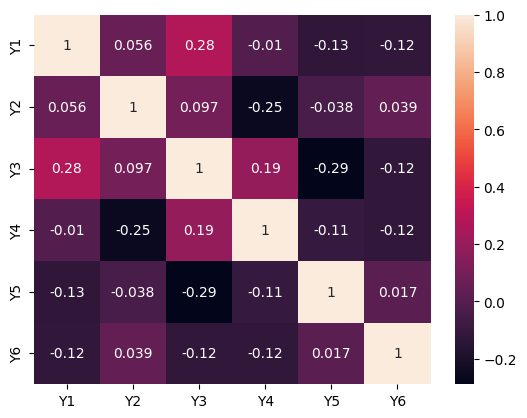

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = y_test.iloc[:,:6]
correlation_mat = df_small.corr(method='pearson')
sns.heatmap(correlation_mat, annot = True)
plt.show()

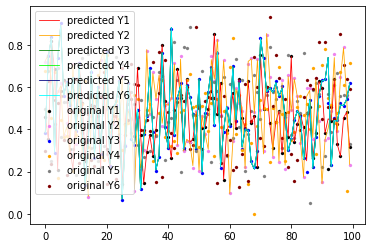

In [ ]:
X_ax = range(len(X_test))
#plt.scatter(y_test[:, 0],y_test[:, 1],y_test[:, 2], s=5, color="blue", label="original")
plt.scatter(X_ax, y_test.iloc[:,0], color="black", s=10,linewidth=0.1,label="original Y1")
plt.scatter(X_ax, y_test.iloc[:,1], color="violet", s=10,linewidth=0.1,label="original Y2")
plt.scatter(X_ax, y_test.iloc[:,2], color="blue", s=10,linewidth=0.1,label="original Y3")
plt.scatter(X_ax, y_test.iloc[:,3], color="orange", s=10,linewidth=0.1,label="original Y4")
plt.scatter(X_ax, y_test.iloc[:,4], color="gray", s=10,linewidth=0.1,label="original Y5")
plt.scatter(X_ax, y_test.iloc[:,5], color="maroon", s=10,linewidth=0.1,label="original Y6")


plt.plot(X_ax, Ypred2[:,0], lw=0.8, color="red", label="predicted Y1")
plt.plot(X_ax, Ypred2[:,1], lw=0.8, color="orange", label="predicted Y2")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="green", label="predicted Y3")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="lime", label="predicted Y4")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="navy", label="predicted Y5")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="aqua", label="predicted Y6")
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(((Ypred2 - y_test) ** 2).mean())
#rmse = sqrt(mean_squared_error(y_test, Ypred2))
#rmse
print("rmse: ",rmse)

from statistics import mean
arrmse = mean(rmse)
print("arrmse: ",arrmse)
from sklearn.metrics import mean_absolute_error as mae
mae = mae(y_test, Ypred2)
print("Mean absolute error : ",mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print("R2: ",r2)
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, Ypred2))
#RMSE2 = sqrt(mean_squared_error(Ytest, Ypred2))

print('RMSE for Ypred2 is',RMSE)
#print('RMSE for Ypred2 is',RMSE2)

rmse:  Y1    0.032511
Y2    0.009757
Y3    0.031276
Y4    0.012936
Y5    0.027191
Y6    0.023516
dtype: float64
arrmse:  0.02286457105860362
Mean absolute error :  0.005846337205214752
R2:  0.9796126013933746
RMSE for Ypred2 is 0.024461101463531167
